# Homework 5: Clustering

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [ ]:
MY_UNIQNAME = 'austinam'

# Part 1: Clustering Music Preferences

In another class, students were asked about their music preferences by rating each of 11 music genres on a 
scale from 1 (=no way) to 10 (=love it).  The de-indentified results are in the data/music.csv file distributed with this
assignment.

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import scale

import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
music = pd.read_csv('data/music.csv')

In [3]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,Muriel,8,7,2,6,8,8,7,6,8,9,9
1,Alexis,4,10,4,3,3,1,10,4,6,5,8
2,Alison,5,10,6,2,3,1,5,6,6,3,5
3,Christopher,3,3,4,3,7,10,2,6,9,8,7
4,Merle,3,3,4,5,6,6,6,4,5,5,6


Your goal for this assignment will be to cluster these preferences using a variety of techniques, including one new one.

### Q1 (40 points). Perform K-means clustering on the music preference data
- Identify the best *k* by using methods that we covered from the lab.
- Plot your results and provide your interpretations.
    - What do you like/dislike about the results?
    - What would improve the results?
    - Explain why.


In [138]:
data = music.drop(['Name'], 1)
data_scaled = scale(data)
target = music['Name'].to_frame()
#data_scaled

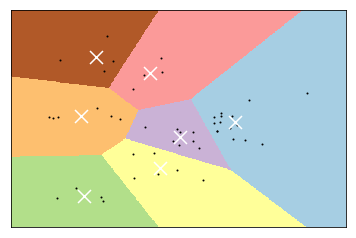

In [144]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)

h = .02 

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [53]:
# Identify the best k by using methods that we covered from the lab
rule_of_thumb = np.sqrt(len(data_scaled)/2)
print(rule_of_thumb)

4.847679857416329


(1, 11.45)

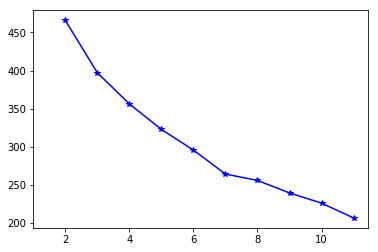

In [145]:
#elbow plot
lst = []
for k in range(2,12):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data_scaled)
    lst.append(k_means.inertia_)
    
fig, ax = plt.subplots()
plt.plot(range(2,12), lst, 'b*-')
plt.xlim(1, plt.xlim()[1])

In [29]:
from sklearn import metrics
from sklearn.cluster import KMeans

(1, 15.65)

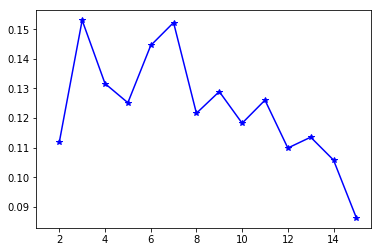

In [146]:
lst2 = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data_scaled)
    lst2.append(metrics.silhouette_score(data, k_means.labels_))

fig, ax = plt.subplots()
plt.plot(range(2,16), lst2, 'b*-')
plt.xlim(1, plt.xlim()[1])

According to rule of thumb, there should be approximately 5 clusters. Based on the elbow plot, there is not a clear point at which increases in k diminishes returns, but it would be at approximately 7 clusters. The silhouette plot shows that there should be three clusters, though we would expect datums that's a good match for its cluster to have a silhouette of 1, and the highest value in this plot is just above 0.15. It is hard to determine the best k based on the results of these three methods, as neither of the graphs provide strong evidence. Additionally, the PCA does not seem to show clearly defined clusters. In order to improve these results, it would be important to gather more data. There are only 47 individuals reporting their music preferences, which is not a lot. Additionally, it would be important to gather data from a more diverse group of individuals, as all of the people in the dataset were in the same class. We can assume that this means that they are similar in age, location, and education level. In order to be confident in choosing the k, I would like to see a clearer indication from either of the graphs, and see more distinct clusters in the PCA.

### Q2 (40 points). Perform hierarchical clustering on the music preference data
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(data_scaled)

4 cluster - vertical line, how many times it runs into that line

/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


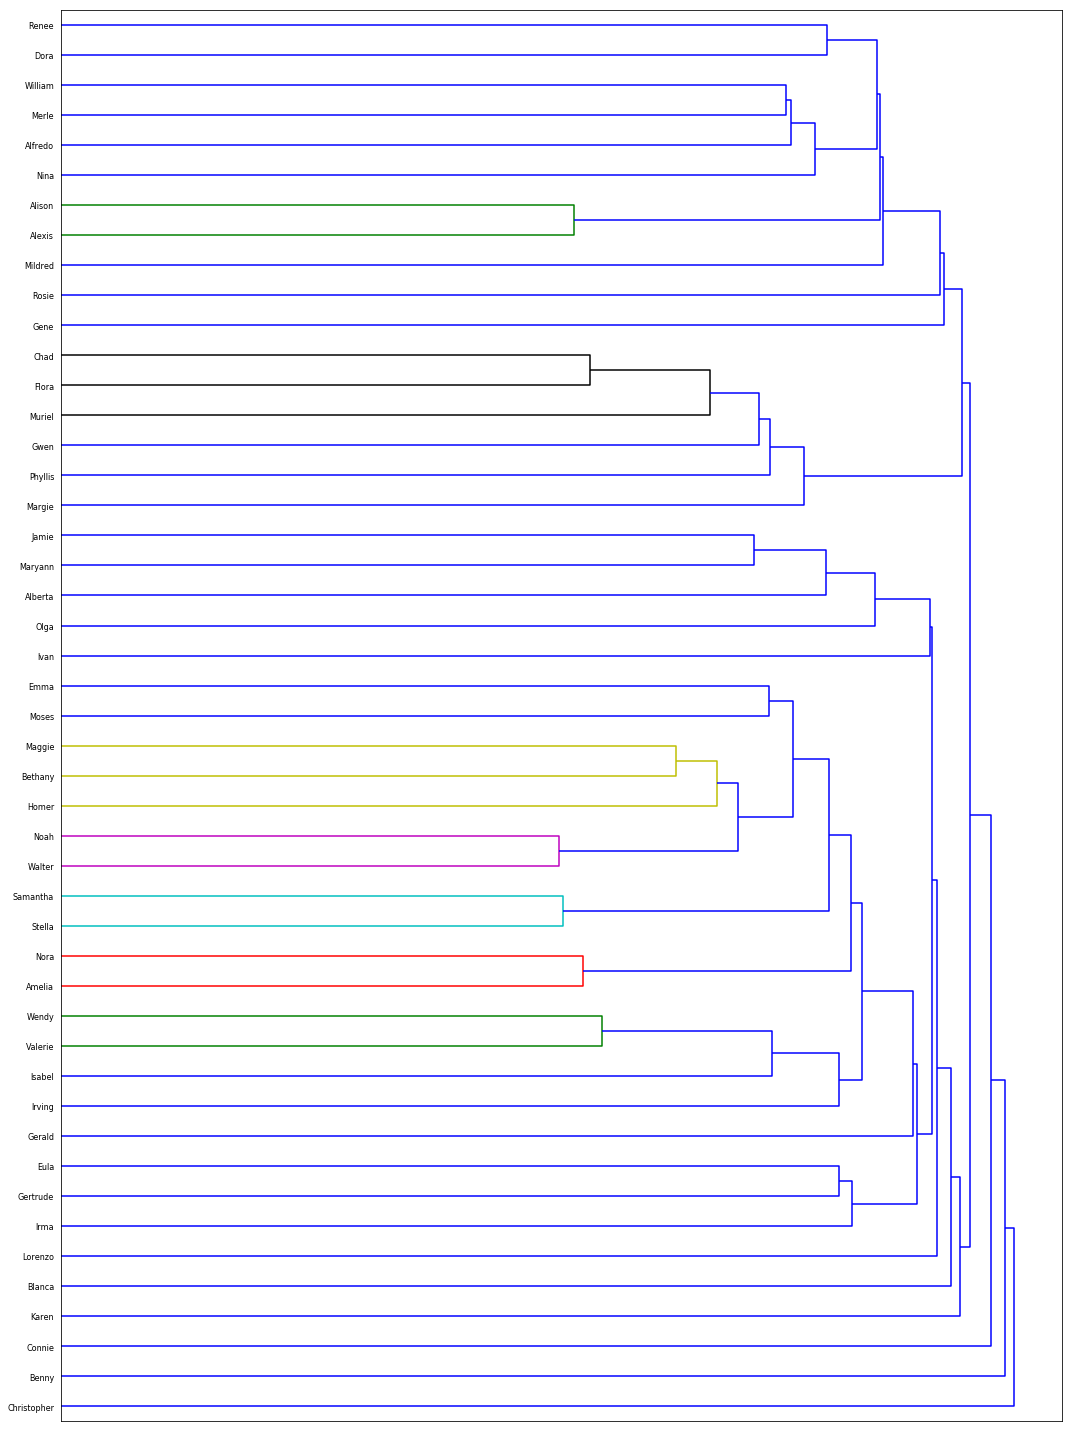

In [60]:
from scipy.cluster.hierarchy import single, dendrogram

linkage_matrix = single(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

can't pick up any patterns

/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


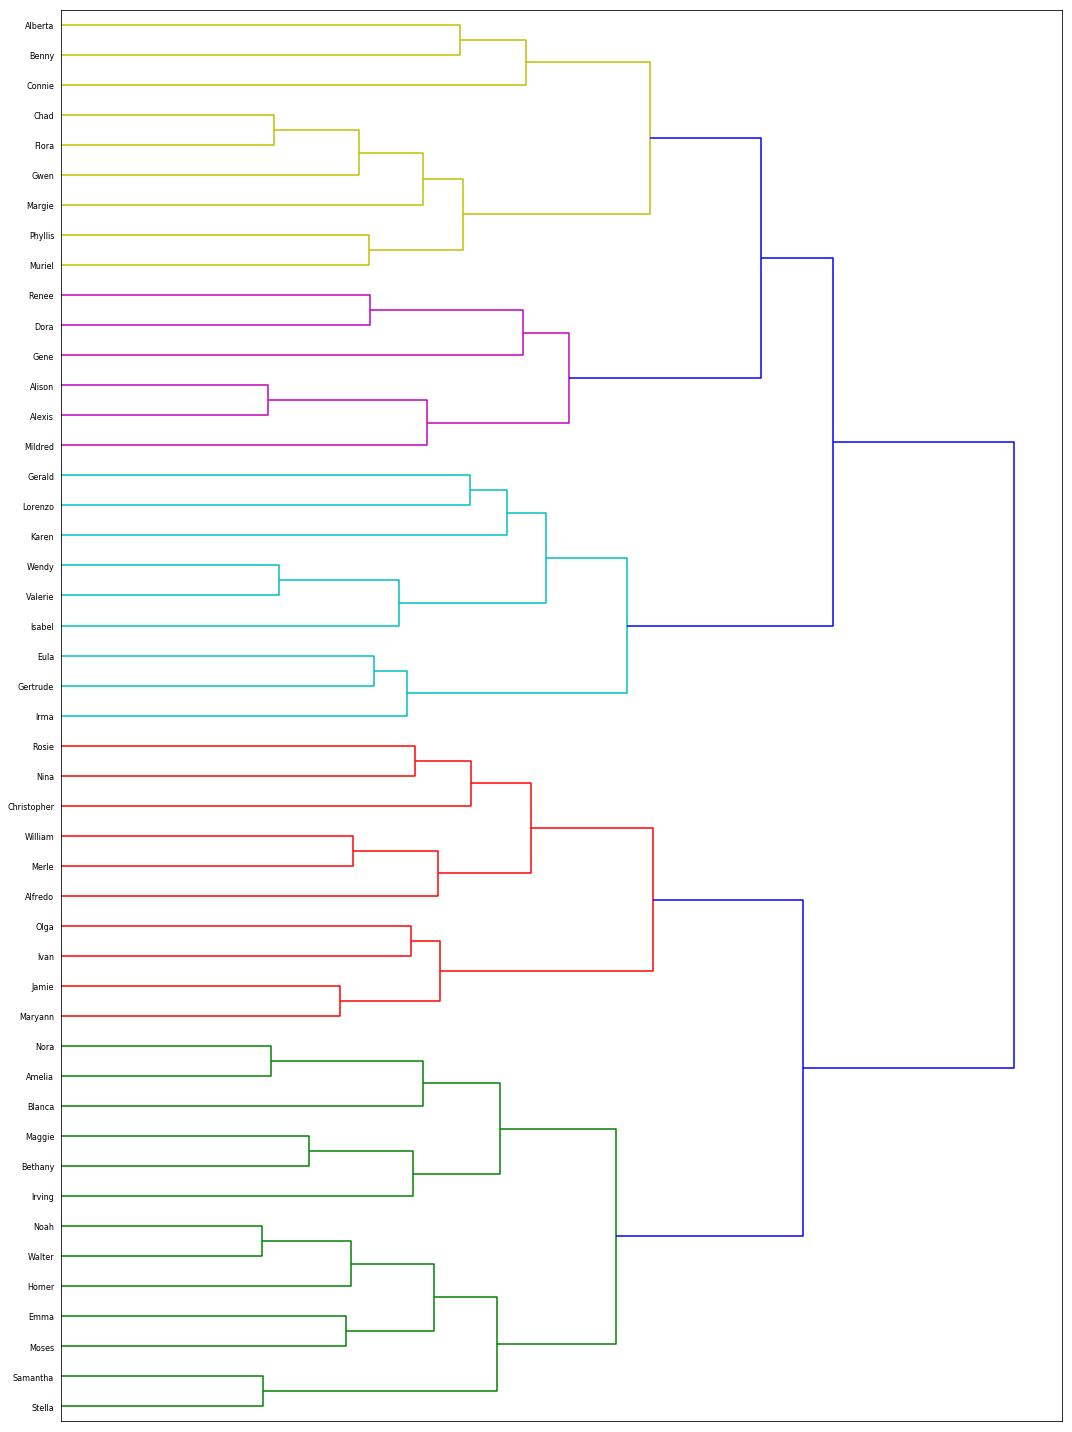

In [61]:
from scipy.cluster.hierarchy import complete, dendrogram

linkage_matrix = complete(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


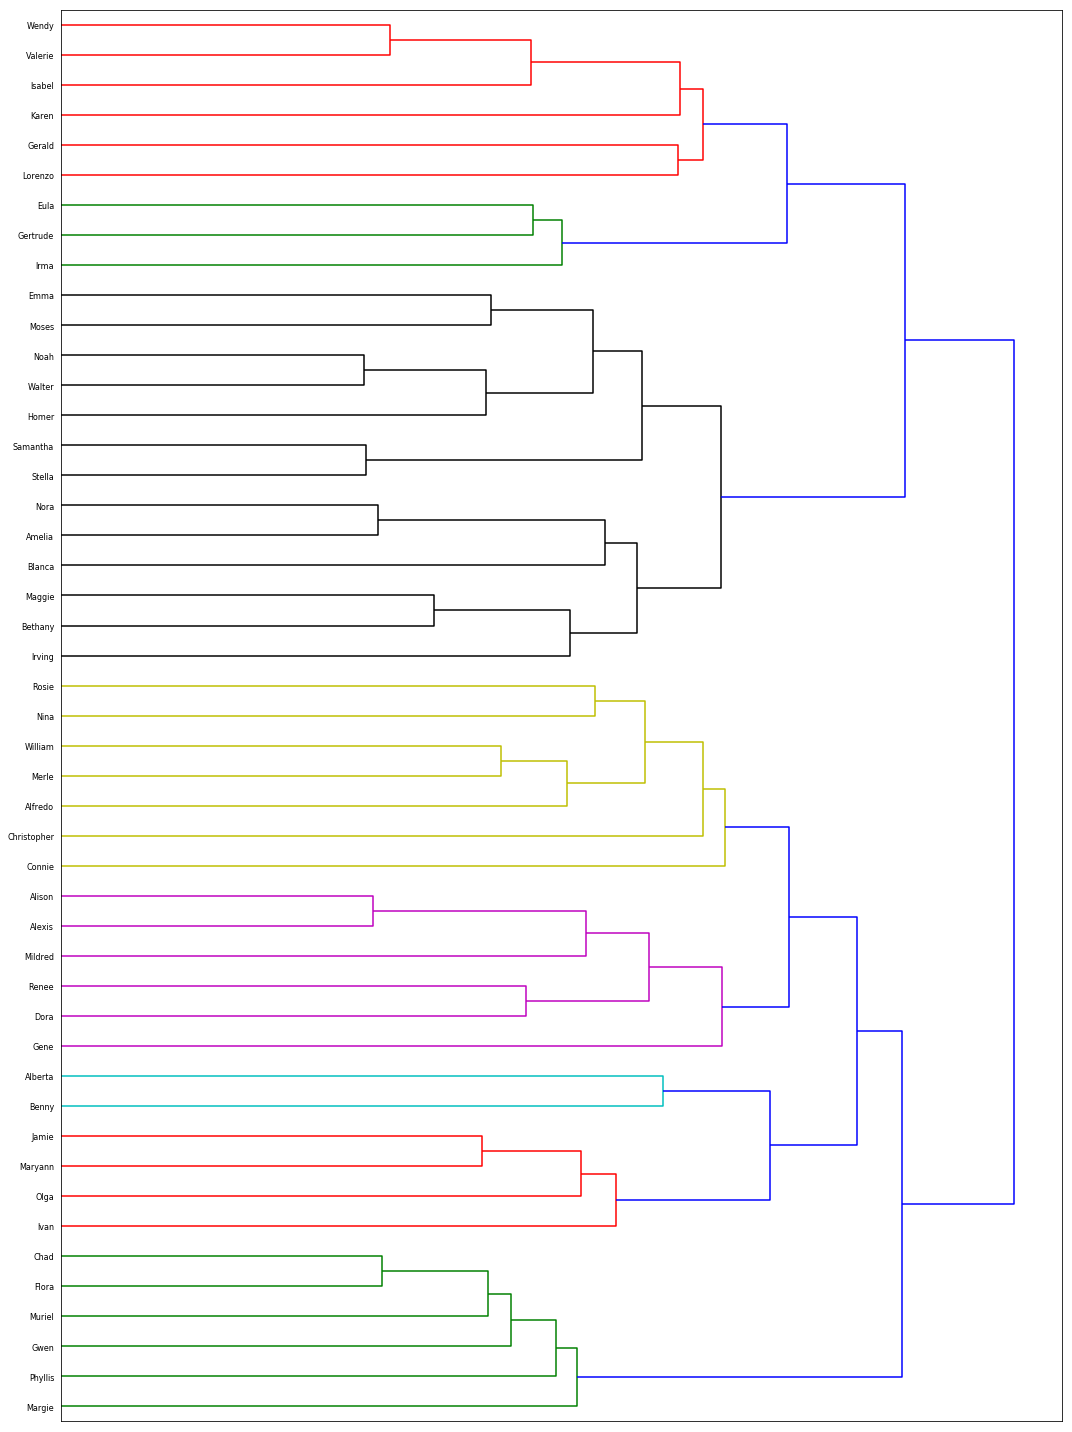

In [62]:
from scipy.cluster.hierarchy import average, dendrogram

linkage_matrix = average(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


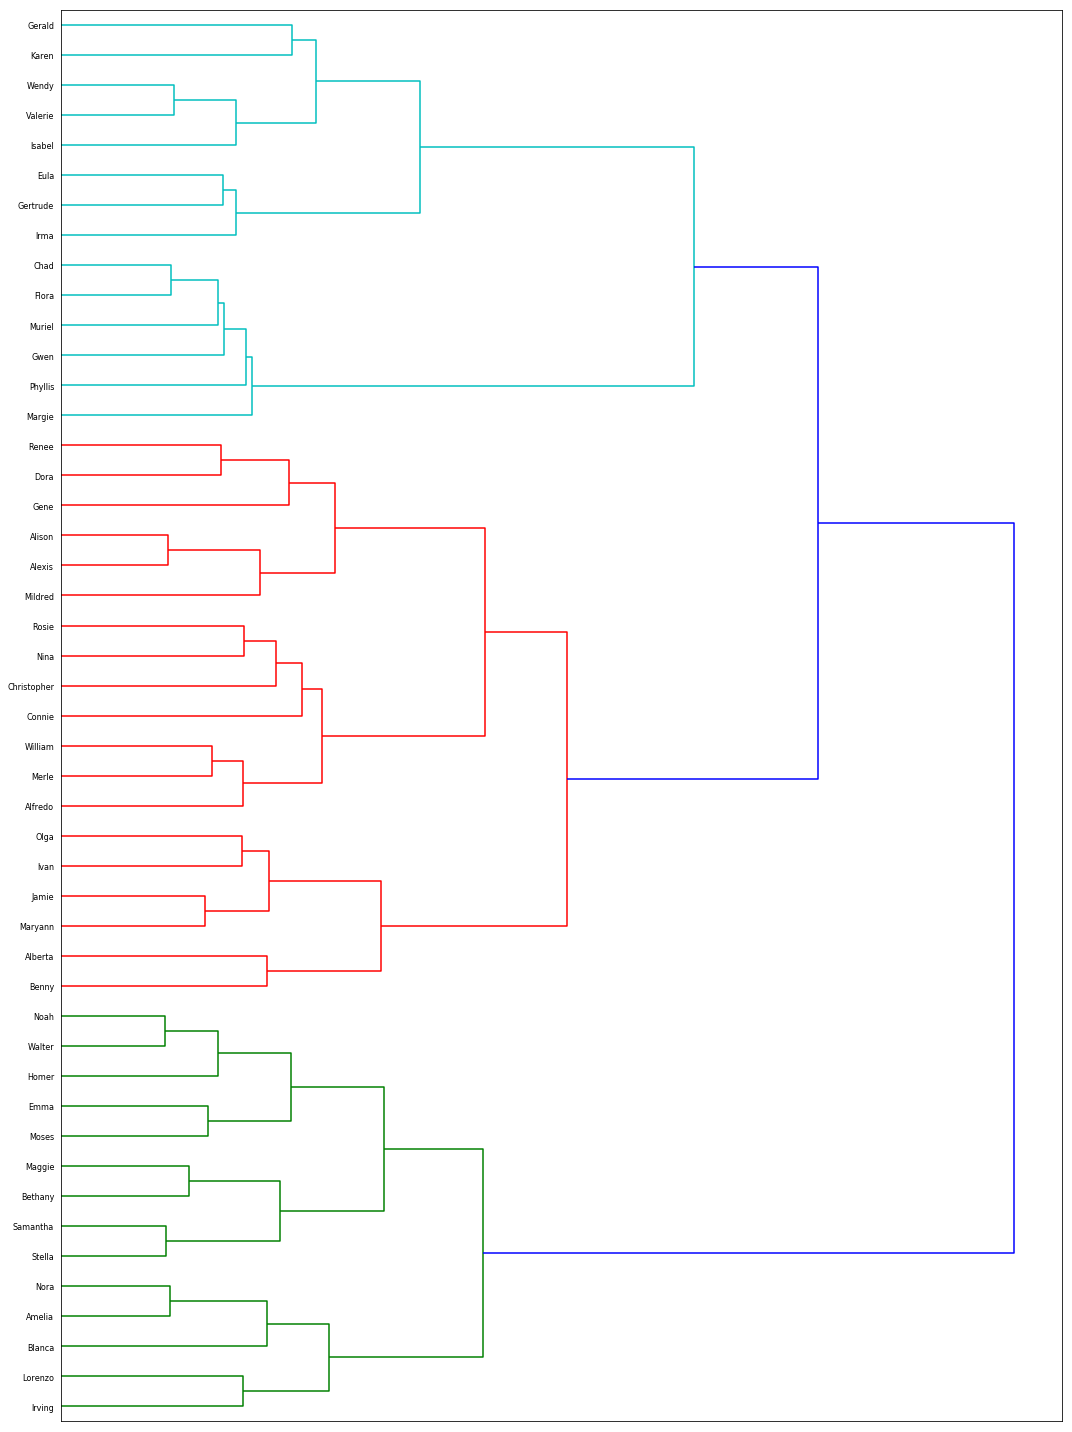

In [123]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

In [135]:
from scipy.cluster.hierarchy import fcluster
clusters_to_plot = fcluster(linkage_matrix, 4, criterion='maxclust')
clusters_to_plot

array([3, 2, 2, 2, 2, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 1, 4, 3,
       4, 1, 1, 3, 2, 2, 4, 3, 2, 1, 2, 2, 1, 4, 3, 1, 1, 1, 1, 1, 4, 2,
       2, 2, 4], dtype=int32)

In [136]:
music['Cluster'] = pd.Series(clusters_to_plot, index=music.index)

Preferences - 4 clusters


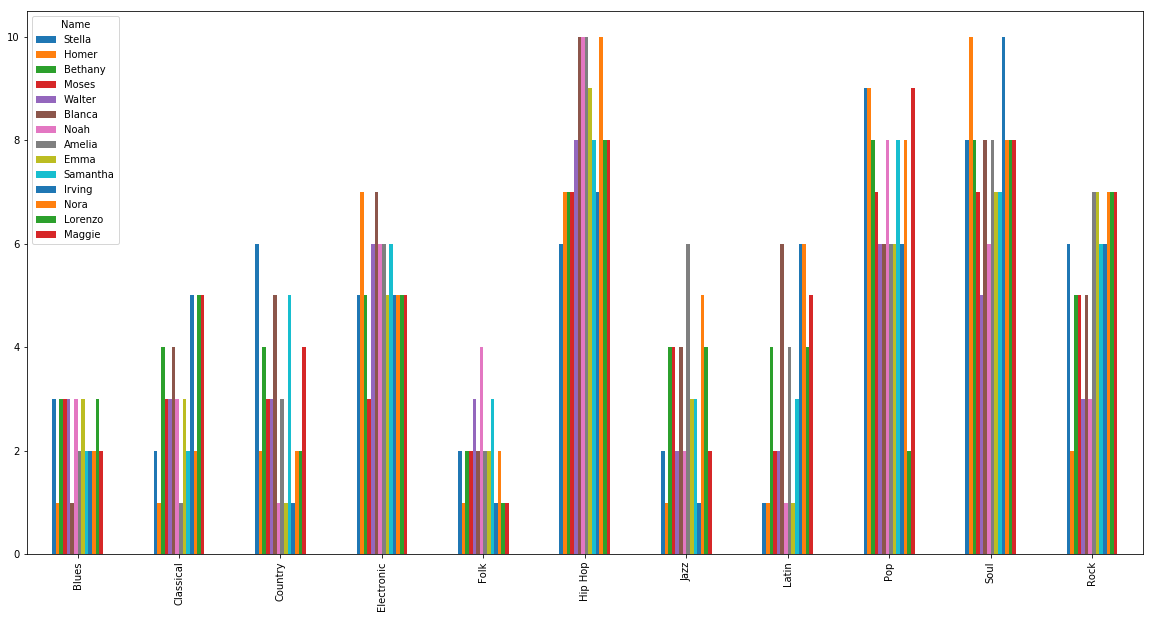

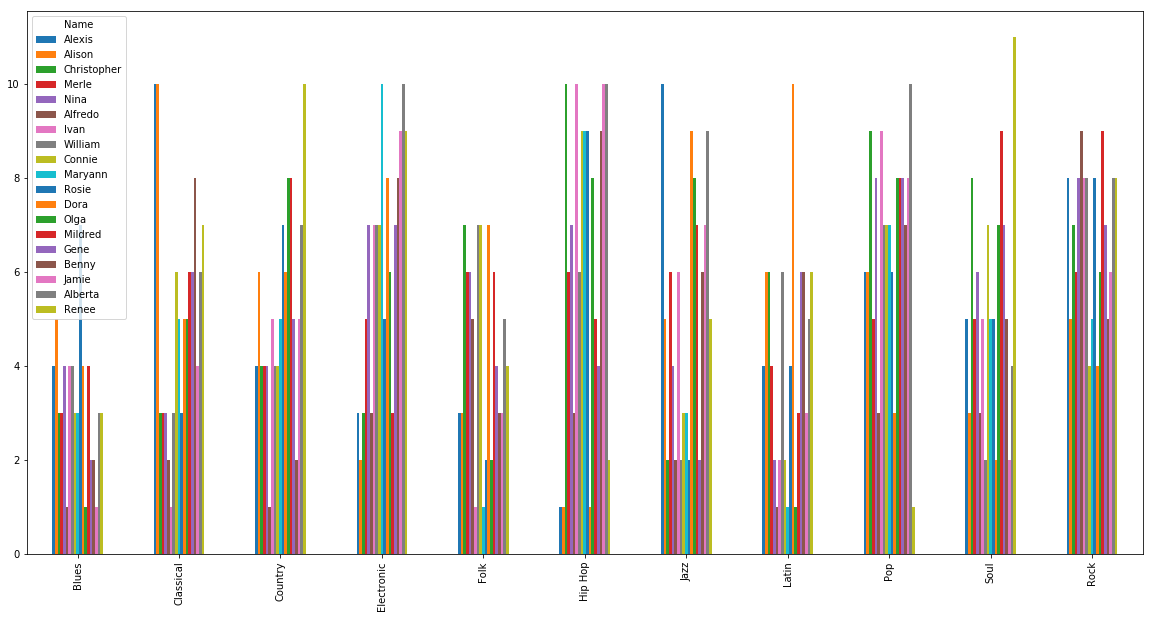

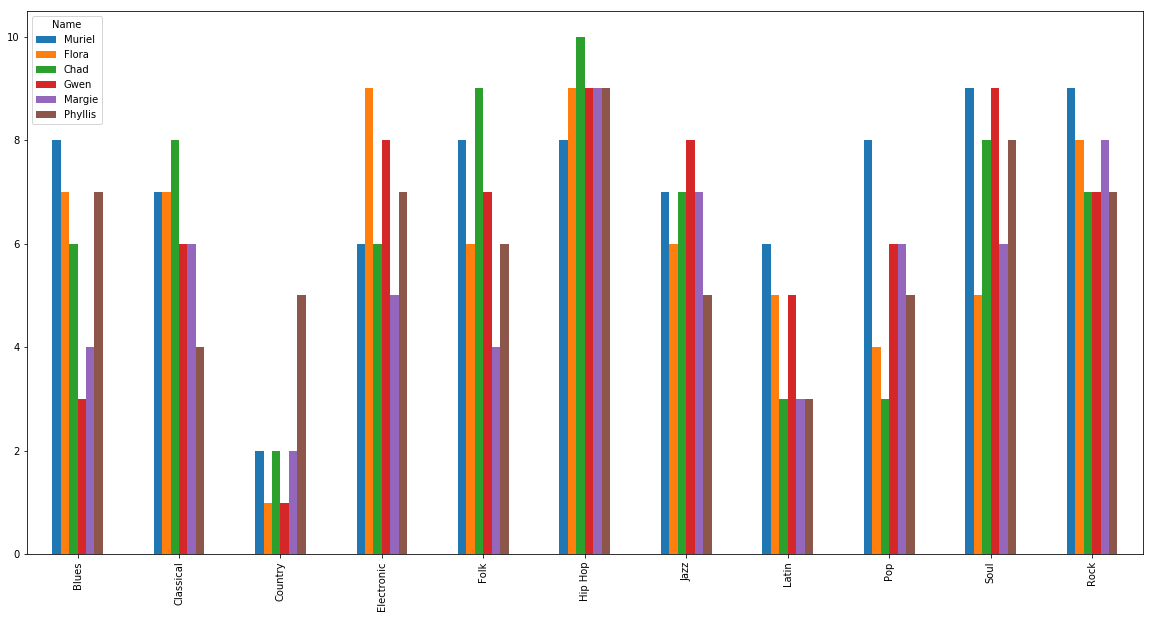

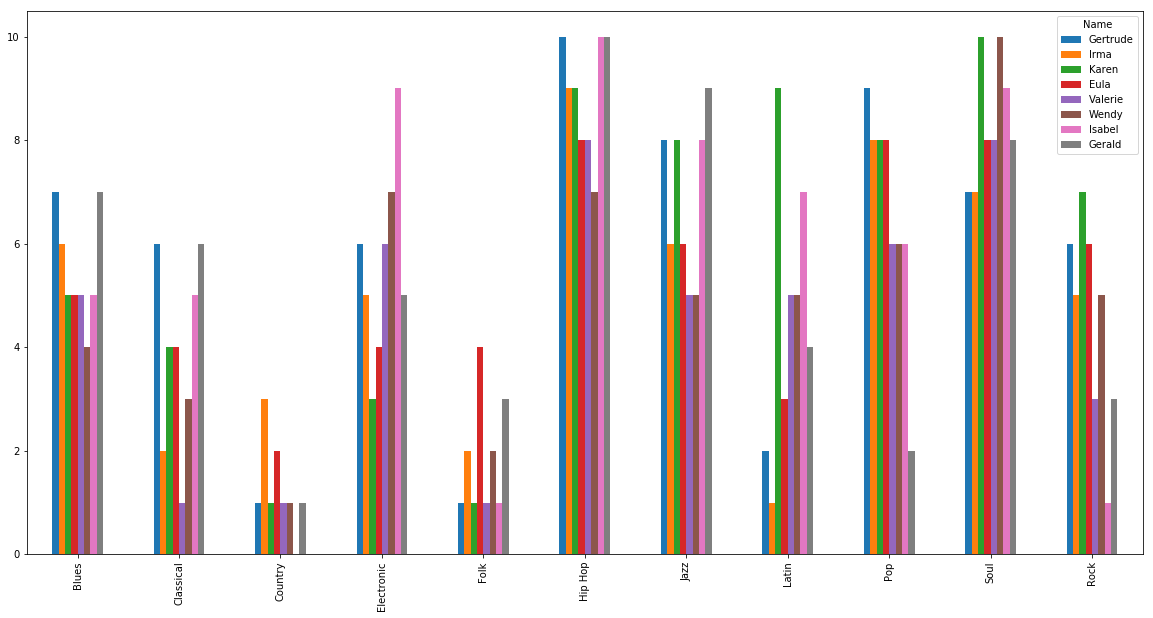

In [151]:
for i in range(1,5):
    df_clust = music[(music.Cluster==i)]
    df_clust = df_clust.drop(columns='Cluster')
    cluster_transposed = df_clust.T
    new_header = cluster_transposed.iloc[0] 
    cluster_transposed = cluster_transposed[1:] 
    cluster_transposed.columns = new_header
    cluster_transposed.plot.bar(figsize=(20,10))
print('Preferences - 4 clusters')

Preferences - 5 clusters


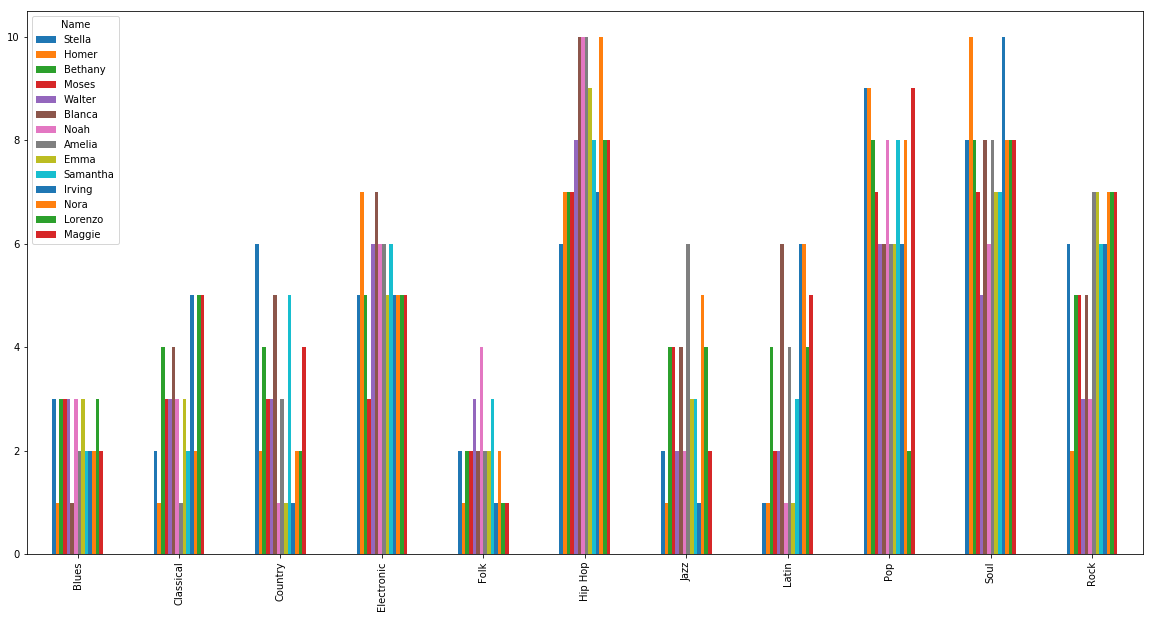

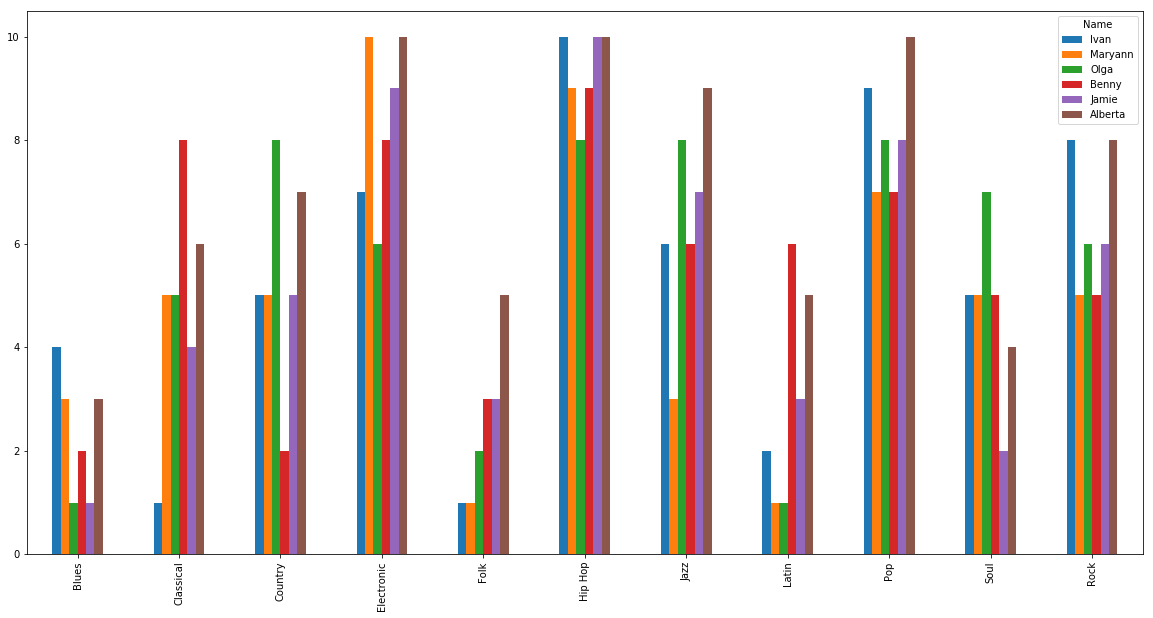

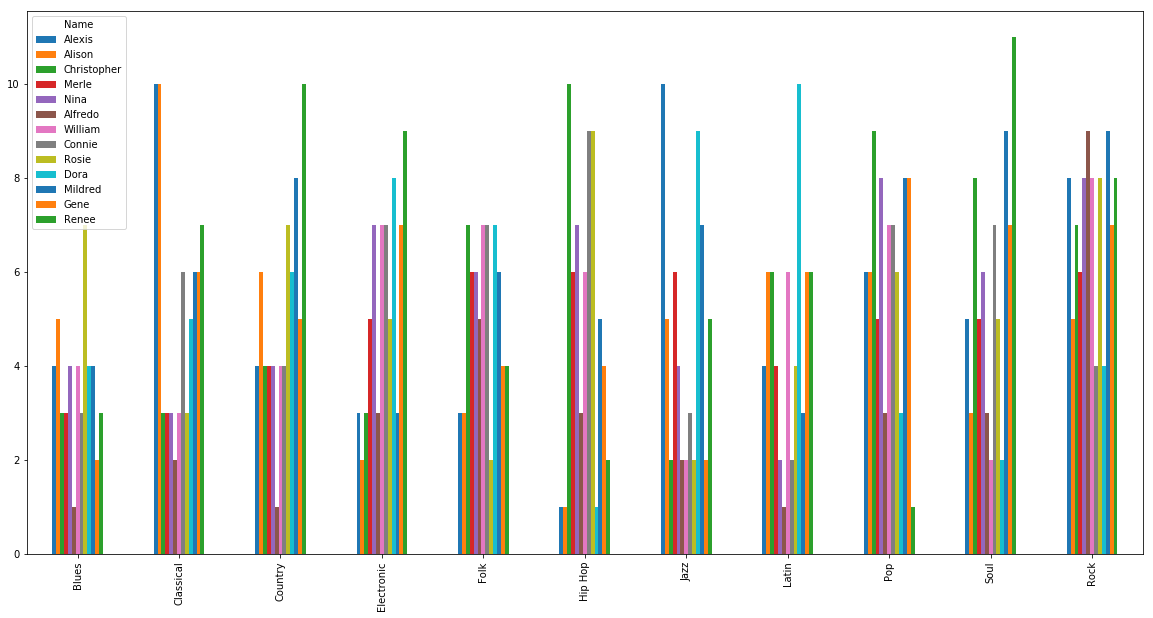

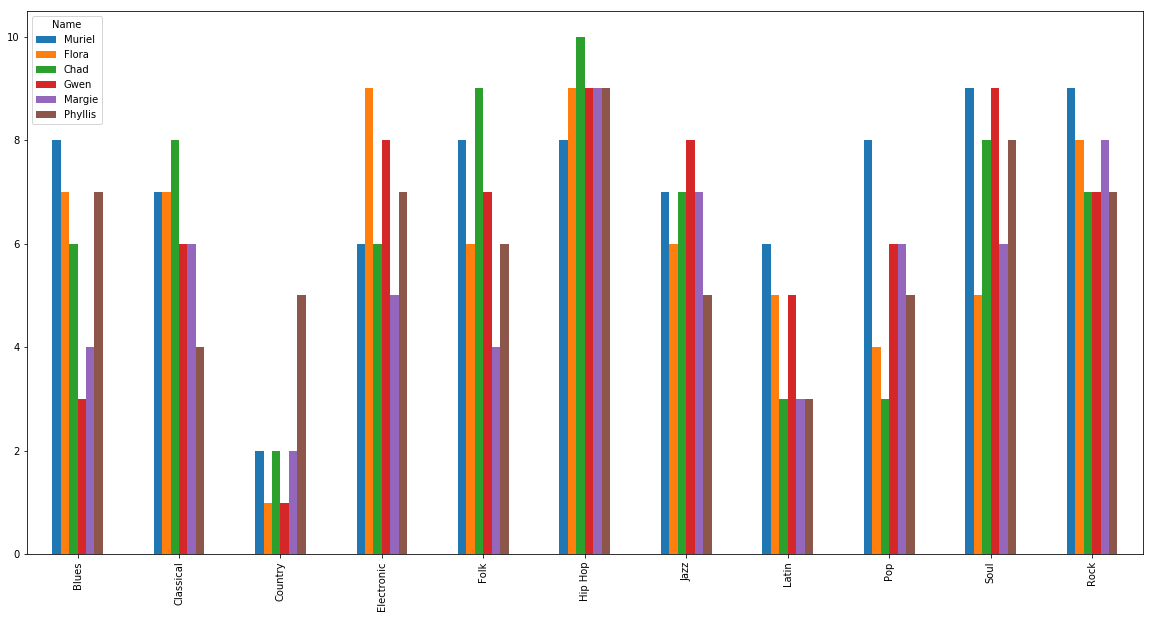

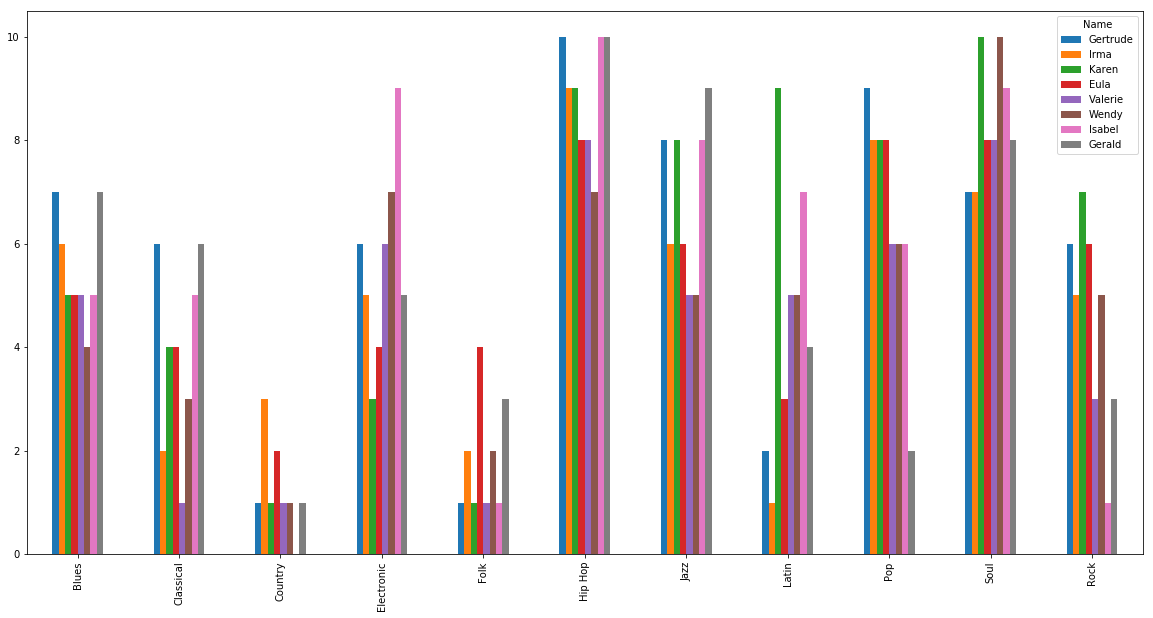

In [153]:
clusters_to_plot = fcluster(linkage_matrix, 5, criterion='maxclust')
clusters_to_plot

music['Cluster'] = pd.Series(clusters_to_plot, index=music.index)

for i in range(1,6):
    df_clust = music[(music.Cluster==i)]
    df_clust = df_clust.drop(columns='Cluster')
    cluster_transposed = df_clust.T
    new_header = cluster_transposed.iloc[0] 
    cluster_transposed = cluster_transposed[1:] 
    cluster_transposed.columns = new_header
    cluster_transposed.plot.bar(figsize=(20,10))
print('Preferences - 5 clusters')

Preferences - 3 clusters


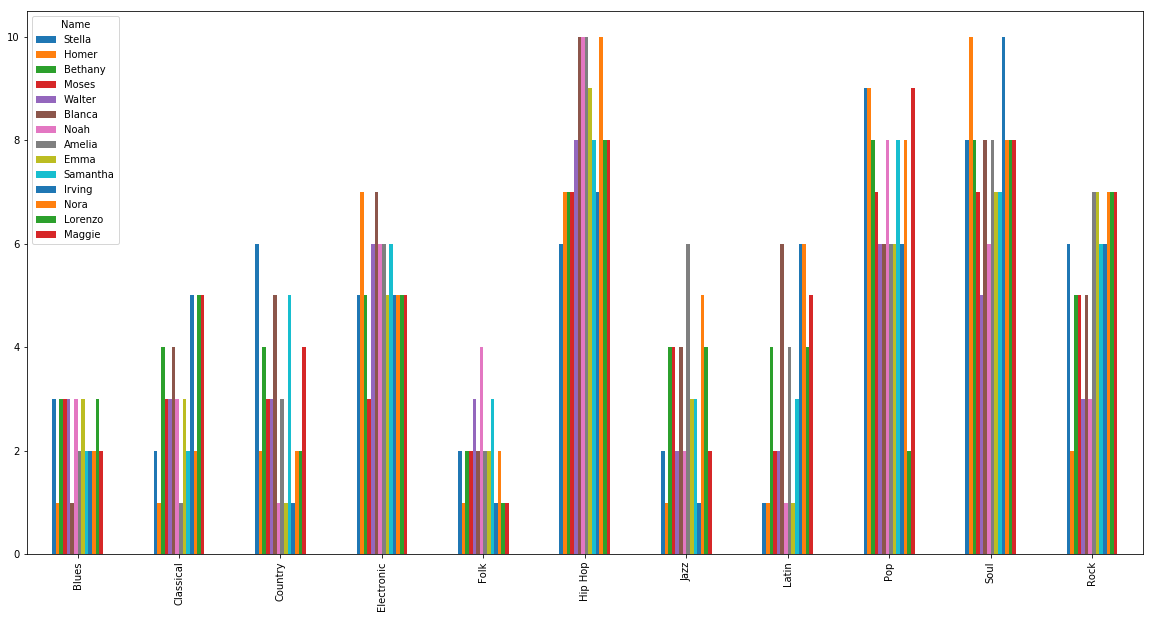

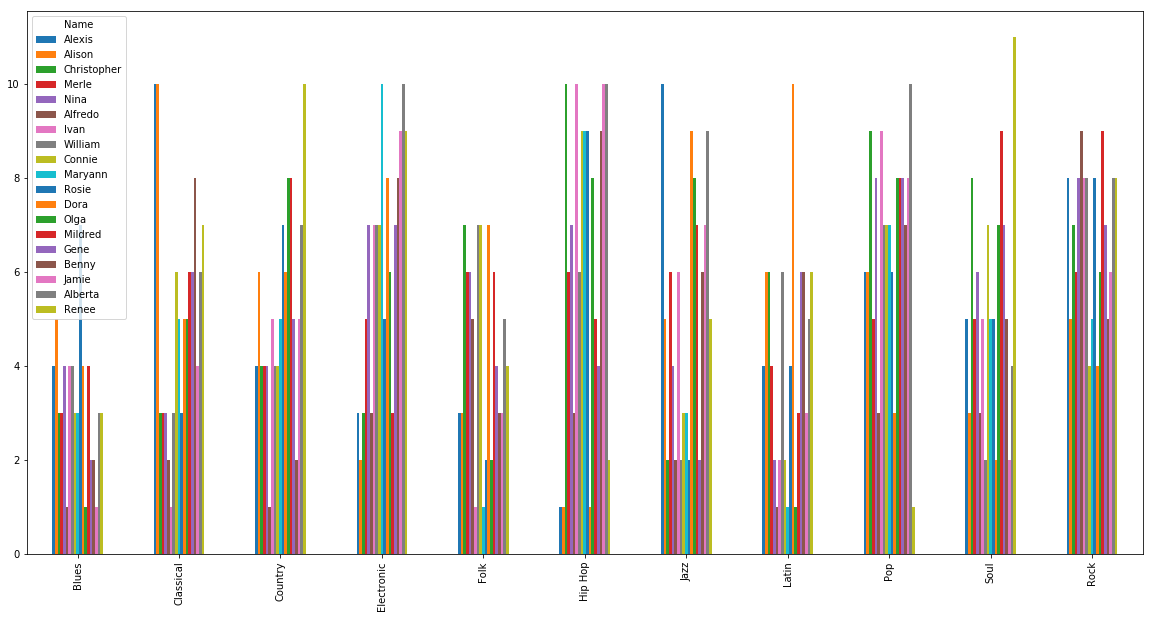

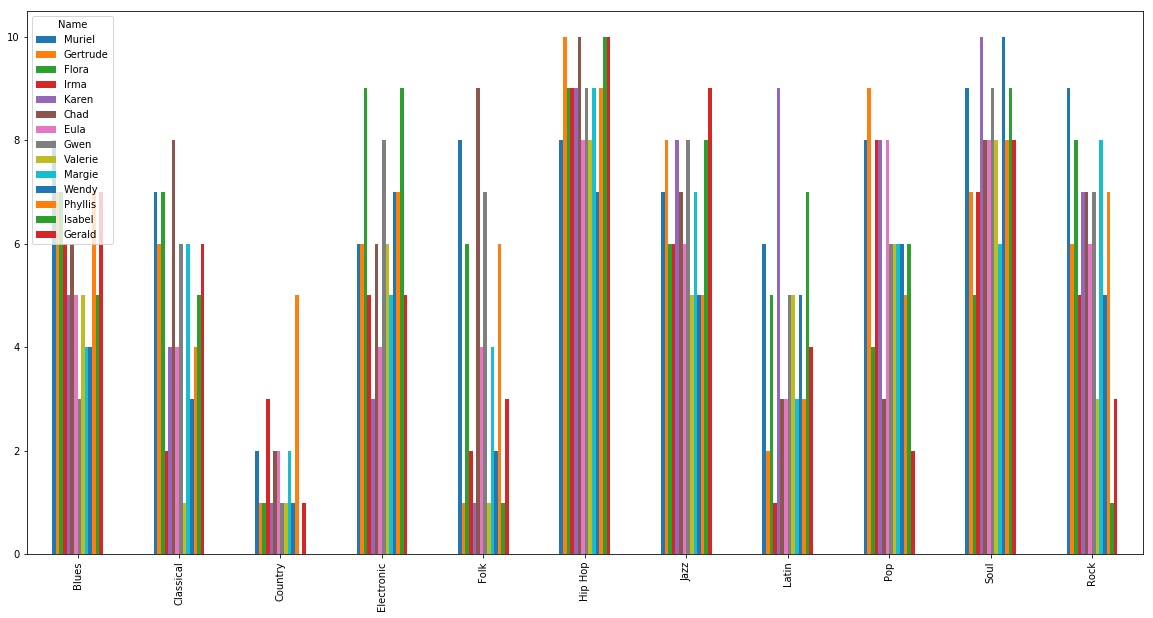

In [154]:
clusters_to_plot = fcluster(linkage_matrix, 3, criterion='maxclust')
clusters_to_plot

music['Cluster'] = pd.Series(clusters_to_plot, index=music.index)

for i in range(1,4):
    df_clust = music[(music.Cluster==i)]
    df_clust = df_clust.drop(columns='Cluster')
    cluster_transposed = df_clust.T
    new_header = cluster_transposed.iloc[0] 
    cluster_transposed = cluster_transposed[1:] 
    cluster_transposed.columns = new_header
    cluster_transposed.plot.bar(figsize=(20,10))
print('Preferences - 3 clusters')

My choice of the best cut point would be 4 clusters, which is based off of the ward dendogram, and taking into account the information from question 1 and additional bar plots of preferences. Looking at the different loss/linkage functions, I did not think the dendograms for min/single, max/complete, or average showed a clear line where you could make a good cut, especially the dendogram for min/single. I would have liked to see support for 4 clusters from all of the dendograms, rather than just one. The indications for k from the elbow plot and rule of thumb were higher than this cut point, but when evaluating bar graphs of individual's preferences, I felt the most comfortable with 4 clusters, though even at that level the preferences did not seem to line up as much as I would have liked them to. Increasing to 5 clusters or decreasing to 3 clusters had even less uniformity in the bar graphs, as shown above. I additionally inspected results increasing the clusters to a higher k, based on results from the k-means, but I did not find that this improved the results.

When you look at the most specific level of the dendogram, you can see that there are clearly individuals who are more similar to each other than others (i.e., Nora and Amelia are more similar in their preferences than Lorenzo and Irving). While there are groups that are more similar to each other, I would like to see more uniformity amongst the individuals in the groups. As discussed above, adding preferences from more individuals, and a more diverse group of individuals, would improve the results. It is difficult to determine clusters with only 47 individuals participating, especially when they are from the same class.

# Bonus (10 points): Vector Quantization

To complete this bonus section you'll need to install the ```imageio``` package.

We can also use K-Means clustering for image compression by reducing the number of colors in an image to *k*. We'll try this for the next question.

![](resources/mandrill-large.png)

`mandrill-large.png` is a 512×512 pixel image represented in 24-bit color. What this means is that for each of the 262144 pixels in the image, there are three numbers ranging from 0 to 255. Let's load it up.

In [8]:
mandrill = np.float64(imageio.imread("resources/mandrill-large.png"))
mandrill

Image([[[164., 150.,  71.],
        [ 63.,  57.,  31.],
        [ 75.,  43.,  10.],
        ...,
        [117., 119.,  68.],
        [141., 170., 101.],
        [179., 188., 118.]],

       [[120., 125.,  62.],
        [135.,  97.,  33.],
        [ 55.,  35.,  23.],
        ...,
        [122., 140.,  98.],
        [136., 159., 128.],
        [120., 138.,  74.]],

       [[ 99.,  74.,  31.],
        [132., 118.,  46.],
        [ 60.,  41.,  36.],
        ...,
        [118.,  93.,  90.],
        [ 87.,  91.,  77.],
        [ 96.,  80.,  49.]],

       ...,

       [[121., 148., 155.],
        [123., 156., 150.],
        [124., 150., 139.],
        ...,
        [110.,  73.,  60.],
        [ 90.,  93.,  70.],
        [ 81.,  80.,  60.]],

       [[126., 169., 168.],
        [117., 151., 151.],
        [121., 136., 133.],
        ...,
        [ 73.,  84.,  68.],
        [ 99.,  69.,  86.],
        [ 80.,  63.,  71.]],

       [[  9.,  11.,  12.],
        [ 10.,  12.,  11.],
        [ 11.,  

In [9]:
mandrill.shape

(512, 512, 3)

To make it easier to work with (especially for `plt.imshow()`), we'll convert each pixel to a float from the default 8-bit per pixel integer coding. We divide by 255 to normalize it to the range [0-1].

In [10]:
mandrill = np.array(mandrill, dtype=np.float64) / 255
mandrill

array([[[0.64313725, 0.58823529, 0.27843137],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411765, 0.16862745, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666667],
        [0.55294118, 0.66666667, 0.39607843],
        [0.70196078, 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313725],
        [0.52941176, 0.38039216, 0.12941176],
        [0.21568627, 0.1372549 , 0.09019608],
        ...,
        [0.47843137, 0.54901961, 0.38431373],
        [0.53333333, 0.62352941, 0.50196078],
        [0.47058824, 0.54117647, 0.29019608]],

       [[0.38823529, 0.29019608, 0.12156863],
        [0.51764706, 0.4627451 , 0.18039216],
        [0.23529412, 0.16078431, 0.14117647],
        ...,
        [0.4627451 , 0.36470588, 0.35294118],
        [0.34117647, 0.35686275, 0.30196078],
        [0.37647059, 0.31372549, 0.19215686]],

       ...,

       [[0.4745098 , 0.58039216, 0.60784314],
        [0.48235294, 0.61176471, 0.58823529],
        [0.48627451, 0

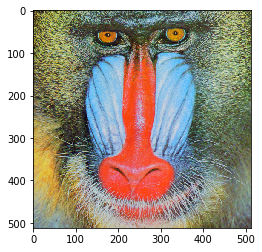

In [11]:
plt.imshow(mandrill)
plt.show()

Let's reshape it into a 2D array. This gives us a long array of [RGB pixel values](https://en.wikipedia.org/wiki/RGB_color_model).

In [12]:
w, h, d = original_shape = tuple(mandrill.shape)
image_array = np.reshape(mandrill, (w * h, d))
image_array

array([[0.64313725, 0.58823529, 0.27843137],
       [0.24705882, 0.22352941, 0.12156863],
       [0.29411765, 0.16862745, 0.03921569],
       ...,
       [0.01960784, 0.03137255, 0.01960784],
       [0.00784314, 0.01960784, 0.        ],
       [0.01568627, 0.01960784, 0.00784314]])


* After running `KMeans`, you should have 16 centroids, where each centroid is a vector of 3 dimensions corresponding to the 16 quantized RGB values you need. Ensure that this is the case by looking at the `kmeans.cluster_centers_`, assuming `kmeans` is the result of your clustering.
* Replace the values in `image_array` with the centroid values. To know which cluster each pixel of `image_array` falls in, you can run `.predict(image_array)` on the result of your `KMeans` clustering. Then from the cluster, you can get the centroid value from `.cluster_centters_` mentioned above.
* Recreate the image data to be displayed. Show it with `plt.imshow()`. How does it look? By how much have we compressed the results?
* Try a few different values of *k* and compare the results.

In [13]:
# Your code here…

(Your response here)